### 09 Equalizing image histogram

- 이미지 히스토그램으로 강도의 분포를 반영 가능
- 히스토그램의 프로퍼티는 이미지 프로퍼티와 관련 있다
- 예를들어 대비가 낮은 이미지는 대부분 픽셀 값의 범위가 좁기 때문에 
- 특정 값으로 bin이 군집되는 히스토그램을 갖는다 
- 그리고 이러한 이미지는 작고 세부적인 부분이 제대로 표현되지 않기 떄문에
- 작업에 사용하기 어렵다
- 이런 문제를 해결하기 위한 기술이 히스토그램 평활화(Histogram Equalization)다
- 여기서는 그레이 스케일과 풀 컬러 이미지 모두에서 히스토그램 평활화를 수행할것이다

1. 모듈을 가져오고 이미지를 그레이 스케일로 불러와 화면에 표시하기

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

grey = cv2.imread('../data/Lena.png', 0)
cv2.imshow('original grey', grey)
cv2.waitKey()
cv2.destroyAllWindows()

2. 그레이스케일 이미지의 히스토그램을 평활화 하기

In [22]:
grey_eq = cv2.equalizeHist(grey)

3. 평활화된 이미지의 히스토그램을 계산하고 그래프를 표시한다

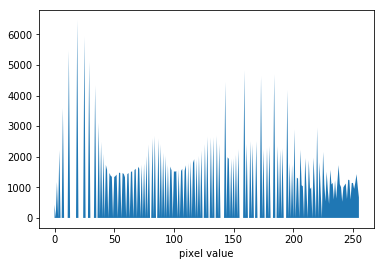

In [23]:
hist, bins = np.histogram(grey_eq, 256, [0,255])
plt.fill_between(range(256), hist, 0)
plt.xlabel('pixel value')
plt.show()

4. 평활화된 이미지를 화면에 표시한다

In [24]:
cv2.imshow('equalized grey', grey_eq)
cv2.waitKey()
cv2.destroyAllWindows()

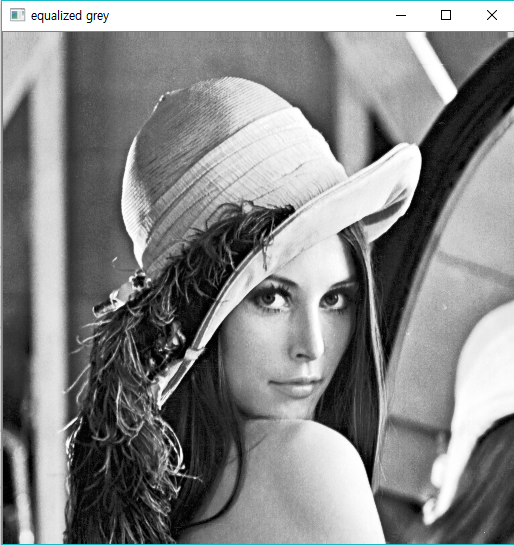

5. BGR로 이미지를 불러와서 HSV 색 공간으로 변환한다

In [8]:
color = cv2.imread('../data/Lena.png')
hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)

6. HSV 이미지의 v 채널을 평활화하고 다시 BGR 색 공간으로 변환하기

In [ ]:
hsv[..., 2] = cv2.equalizeHist(hsv[..., 2])
color_eq = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2.imshow('original color', color)
cv2.waitKey()
cv2.destroyAllWindows()

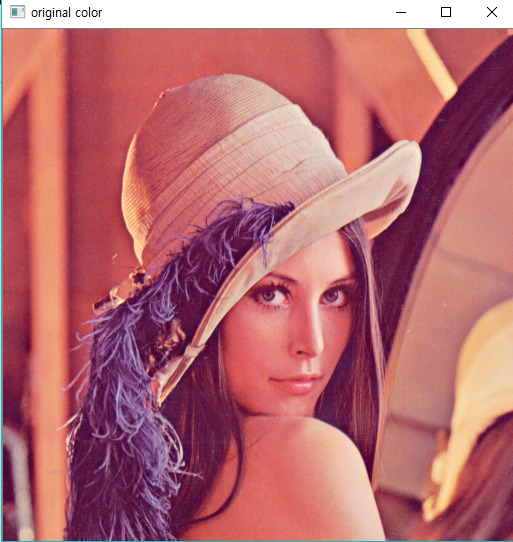

7. 평활화된 풀 컬러 이미지를 화면에 표시하기

In [7]:
cv2.imshow('equalized color', color_eq)
cv2.waitKey()
cv2.destroyAllWindows()

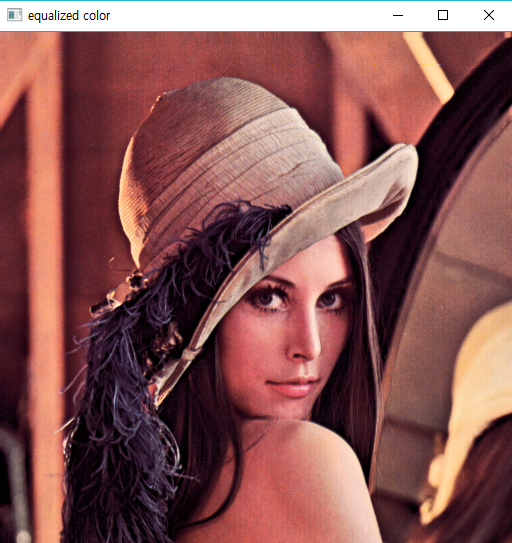

- 히스토그램의 평활화는 OpenCV의 특별한 함수 equalizeHist 로 수행한다
- 이 함수는 대비를 개선할 이미지를 입력받는다. 
- *단일 채널 이미지만 입력받기 떄문에 오직 그레이스케일 이미지에 직접 적용이 가능하며,
- 단일 채널의 평활화된 이미지를 반환한다
- 이 함수를 풀 컬러 이미지에 적용하기 위해서는 강도 정보를 갖는 단일 채널과
- 색상 정보를 갖는 다른 채널들을 갖게 변환해야 한다
- HSV 색 공간은 마지막 v 채널이 밝기를 인코딩하기 떄문에 적용 요구 사항에 완벽하게 부합한다
    - 먼저 입력 이미지를 HSV 색 공간으로 변환하고,
    - V 채널에 equalizeHist를 적용하고,
    - 결과를 RGB로 다시 변환하는 것으로 
    - 풀 컬러 이미지에 대한 히스토그램 평활화를 수행할 수 있다.